<a href="https://colab.research.google.com/github/AleynaD/hu-bby261-2021-final-/blob/main/finalproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

1


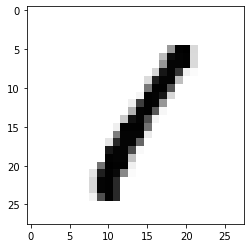

In [ ]:
import matplotlib.pyplot as plt
image_index = 3 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 0
plt.imshow(x_train[image_index], cmap='Greys')

# Yeni Bölüm

# Yeni Bölüm

In [ ]:
print(x_train[image_index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28,28,1 )
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2067 - accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0436 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0346 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0300 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0234 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 27s 14m

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0573 - accuracy: 0.9868


[0.057261381298303604, 0.9868000149726868]

9


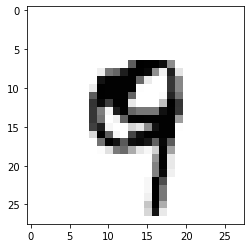

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


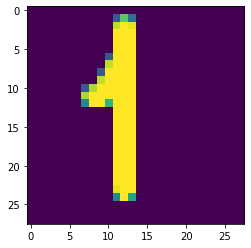

In [ ]:

from PIL import Image
import numpy as np

png = Image.open("/content/drive/MyDrive/PNG/1-1.png").convert("L")
png = np.resize(png, (28, 28, 1))
pngBinary = np.array(png)
plt.imshow(pngBinary.reshape(28, 28))

tahminDizi = model.predict(pngBinary.reshape(1, 28, 28, 1))
#tahminSayi = model.predict_classes(1,28,28,1)) // Ocak 2021'de devreden çıkıyormuş.
tahminSayi = np.argmax(model.predict(pngBinary.reshape(1, 28, 28, 1)), axis=-1)

print(tahminDizi)
print(tahminSayi)

